In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [117]:
df_train = pd.read_csv('train.csv')

In [118]:
df_train.shape

(891, 12)

In [119]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [120]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

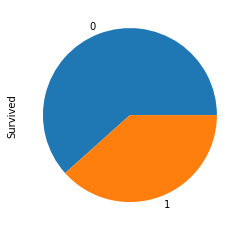

In [123]:
df_train['Survived'].value_counts().plot(kind='pie')

In [124]:
#feature processing
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [125]:
df_train['Embarked'].fillna('S', inplace= True)

In [126]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace= True)

In [127]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [128]:
df_train['Sex'] =df_train['Sex'].apply(lambda x:1 if x== 'female' else 0)

In [129]:
df_train.drop('Name',axis=1, inplace=True)

In [130]:
df_train.drop('Ticket',axis=1, inplace=True)

In [131]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [132]:
embarked_df=pd.get_dummies(df_train['Embarked'])

In [133]:
embarked_df

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [134]:
embarked_df.shape

(891, 3)

In [135]:
df_train=pd.concat([df_train,embarked_df],axis=1)

In [136]:
df_train.drop('Embarked',axis =1 ,inplace =True)

In [137]:
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [138]:
df_train.drop('Cabin',axis=1,inplace=True)

In [139]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
C,-0.001205,0.168240,-0.243292,0.082853,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Q,-0.033606,0.003650,0.221009,0.074115,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421


<h1> Implementing machine learning model</h1>

In [140]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [141]:
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
nb = GaussianNB()

In [142]:
models = {'svc':svc, 'knn':knn, 'dtc':dtc, 'nb':nb}

In [143]:
X,y = df_train.drop('Survived', axis = 1), df_train['Survived']

In [144]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 420)

In [145]:
model_accuracy = {}
for model in models.keys():
    mod = models[model].fit(train_X, train_y)
    predict = mod.predict(test_X)
    if model not in model_accuracy.keys():
        model_accuracy.update({model:accuracy_score(test_y, predict)})

In [146]:
model_accuracy

{'svc': 0.6201117318435754,
 'knn': 0.6424581005586593,
 'dtc': 0.8044692737430168,
 'nb': 0.7877094972067039}

<h1>predict test dataset</h1>

In [147]:
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
nb = GaussianNB()

In [148]:
models = {'svc':svc, 'knn':knn, 'dtc':dtc, 'nb':nb}

In [149]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 420)

In [150]:
model_accuracy = {}
for model in models.keys():
    mod = models[model].fit(train_X, train_y)
    predict = mod.predict(test_X)
    if model not in model_accuracy.keys():
        model_accuracy.update({model:accuracy_score(test_y, predict)})

In [151]:
model_accuracy 

{'svc': 0.6201117318435754,
 'knn': 0.6424581005586593,
 'dtc': 0.8212290502793296,
 'nb': 0.7877094972067039}

In [154]:
df_test=pd.read_csv('test.csv')

In [155]:
df_test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


<h1>Ploting</h1>

<AxesSubplot:>

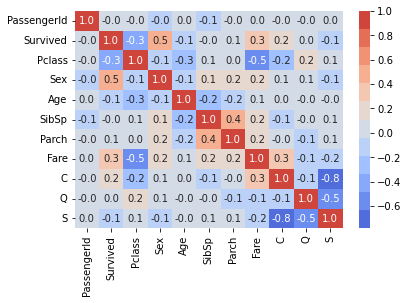

In [156]:
sns.heatmap(df_train.corr(), annot=True, fmt=".1f", cmap = sns.color_palette("coolwarm", 12), mask = np.zeros_like(df_train.corr()))


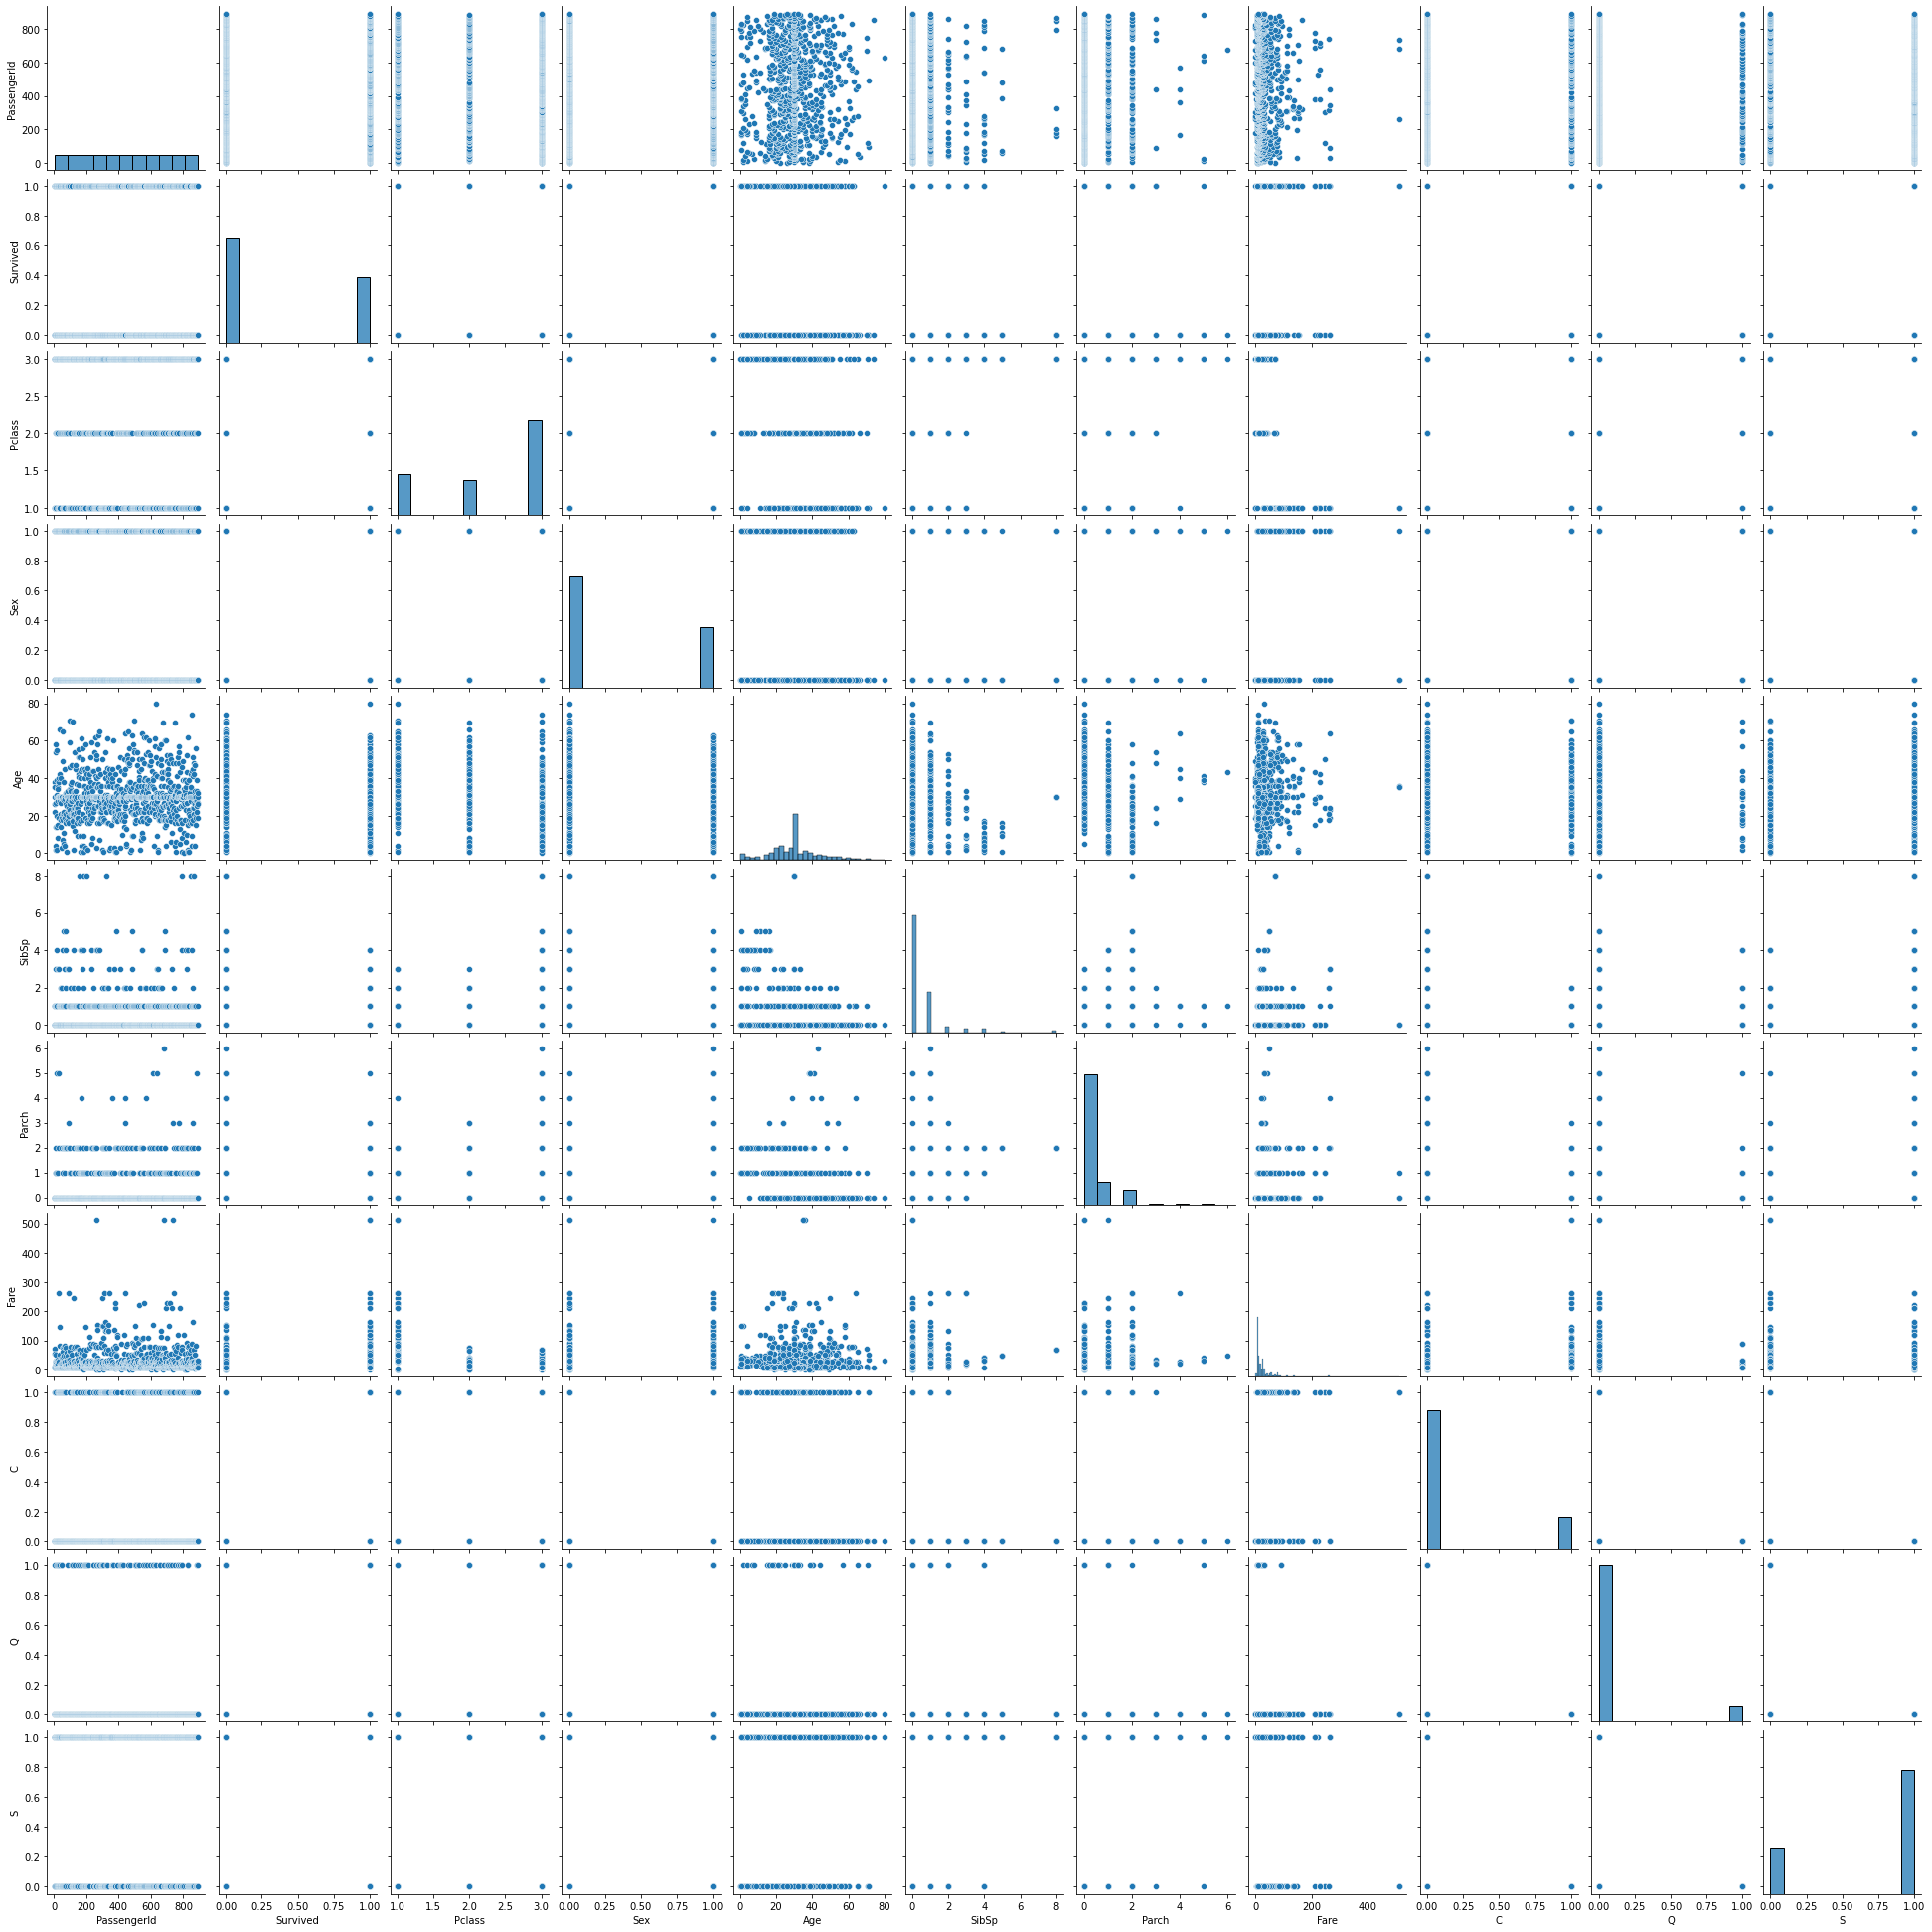

In [158]:
sns.pairplot(df_train,palette = ["#000000","#da8829"])

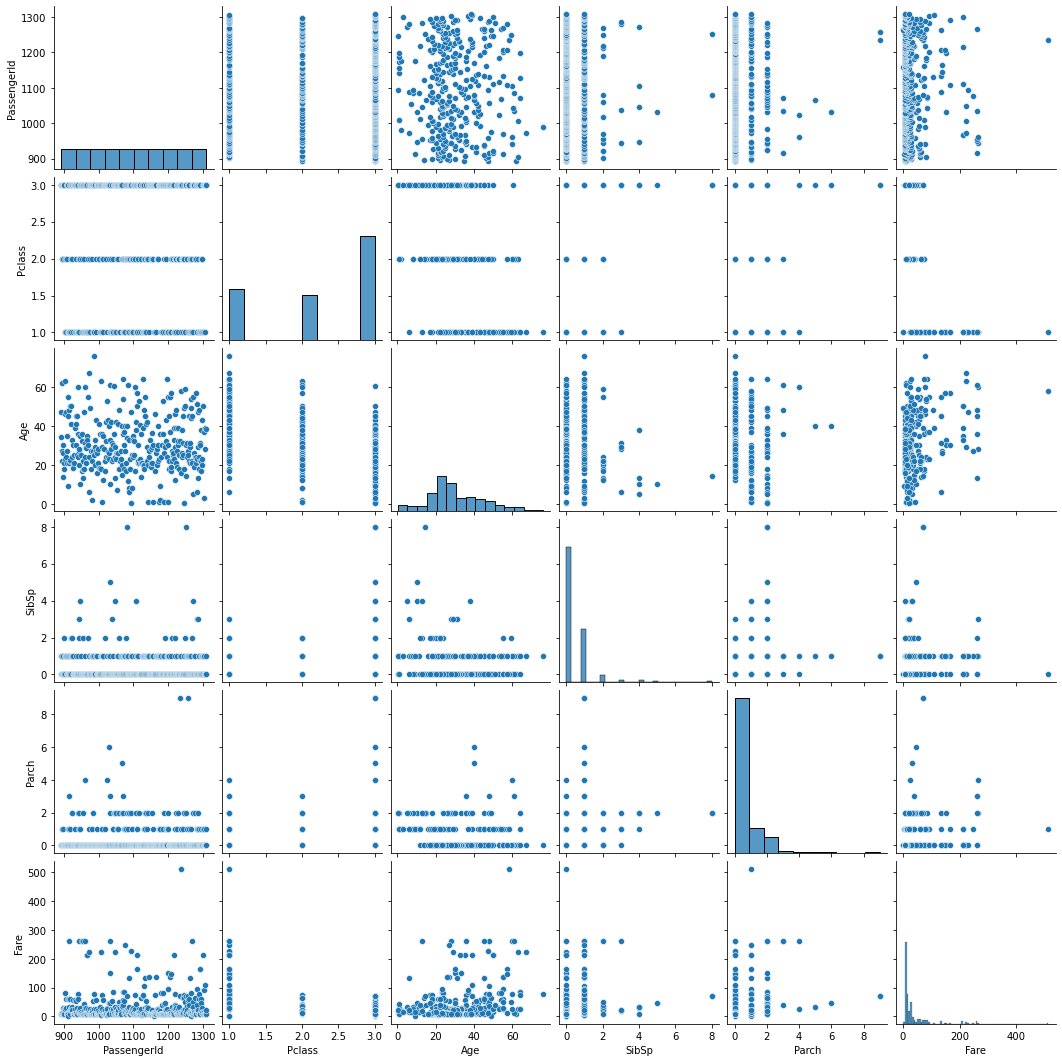

In [159]:
sns.pairplot(df_test,palette = ["#000000","#da8829"])